In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Importing Your Data

Use of this notebook requires a Excel data sheet with the following information for each unique analysis:

Required:

    U-Pb Age Mode (or other provenance-based grouping that sorts the data by source terrane)

    Lag Time (= ZHe Age - Depositional Age)

    Closure Interval (= U-Pb Best Age - ZHe Age)

Recommended, but not required:

    Sample ID

    Analysis ID

    Depositional Age

    ZHe Age

    ZHe Age Error

    U-Pb Best Age
        
If you have volcanic zircons you will also want to sort those analyses as separate source terranes since they have different exhumation histories than their nonvolcanic counterparts.

To do so, apply a volcanic determination filter (Saylor et al., 2012):

    if Closure Interval<ZHe Age Error than the zircon can be considered volcanic

I recommend creating a new column in the excel sheet that incorporates the volcanic determination into the provenance grouping. E.g.:

    U-Pb Age Mode V (where volcanic analyses get grouped by their U-Pb Age Mode appended with a V)

In [2]:
xl = pd.ExcelFile("C:/Users/culle/Documents/Data/UThHe_Data/ZHe_Kortyna_TO_sum.xlsx")
df = xl.parse("Lag_Time")

df[:10]

,Index,Sample,Sample_ID,Sample_ID_V,Formation,Formation_V,Age,Age_V,Volcanic?,YSG,...,Lag_Time3,Lag_Time4,Δt,Δt_err_1,Δt_err_2,Strat_Age,Upb_Mode_v2,Lag_Time_Avg,Lag_Time_St_Dev,Lag_Time_2_St_Dev
0,25,zDD-16TO-13-122,16TO-13,16TO-13,Canoe,Canoe,Eocene,Eocene,No,54.8,...,27.140528,27.140528,20.121733,7.562261,6.103778,NaN,NaN,NaN,NaN,NaN
1,33,zDD-16TO-13-55,16TO-13,16TO-13,Canoe,Canoe,Eocene,Eocene,No,54.8,...,30.630184,30.630184,21.890570,7.320754,6.237278,NaN,NaN,NaN,NaN,NaN
2,43,zDD-16TO-13-69,16TO-13,16TO-13,Canoe,Canoe,Eocene,Eocene,No,54.8,...,37.093260,37.093260,13.106241,7.899501,6.726322,NaN,NaN,NaN,NaN,NaN
3,48,zDD-16TO-13-42,16TO-13,16TO-13,Canoe,Canoe,Eocene,Eocene,No,54.8,...,39.260149,39.260149,10.999863,8.460011,6.970491,NaN,NaN,NaN,NaN,NaN
4,50,zDD-16TO-13-35,16TO-13,16TO-13,Canoe,Canoe,Eocene,Eocene,No,54.8,...,40.970810,40.970810,12.815916,8.086727,6.990494,NaN,NaN,NaN,NaN,NaN
5,24,zDD-16TO-11-114,16TO-11,16TO-11,Hannold Hill,Hannold Hill,Eocene,Eocene,No,55.0,...,24.909068,24.909068,22.828641,7.837709,6.170806,NaN,NaN,NaN,NaN,NaN
6,30,zDD-16TO-11-22,16TO-11,16TO-11,Hannold Hill,Hannold Hill,Eocene,Eocene,No,55.0,...,26.929841,26.929841,16.357555,7.987396,6.312599,NaN,NaN,NaN,NaN,NaN
7,15,zDD-16TO-09-111,16TO-09,16TO-09,Upper Black Peaks,Upper Black Peaks,Paleocene,Paleocene,No,64.3,...,14.942623,14.942623,27.340164,6.432787,5.445054,58.0,85-65,6.735030,10.047520,20.095041
8,16,zDD-16TO-09-68,16TO-09,16TO-09,Upper Black Peaks,Upper Black Peaks,Paleocene,Paleocene,No,64.3,...,15.793887,15.793887,24.051956,6.495844,5.506826,58.0,Permian,82.489640,53.240091,106.480182
9,17,zDD-16TO-09-130,16TO-09,16TO-09,Upper Black Peaks,Upper Black Peaks,Paleocene,Paleocene,No,64.3,...,15.888834,15.888834,32.664043,6.602876,5.534535,58.0,105-90 V,18.205248,16.064932,32.129864


### Calculating the Lag Time and Closure Intervals

In [3]:
df['lag_times'] = df['Age_He'] - df['Age_Model']
df['lag_time_errs'] = (df['Age_He_err']**2 + df['Age_Model_err']**2)**0.5

df['closure_intervals'] = df['Age_UPb'] - df['Age_He']
df['closure_interval_errs'] = (df['Age_UPb_err']**2 + df['Age_He_err']**2)**0.5

df[:10]

,Index,Sample,Sample_ID,Sample_ID_V,Formation,Formation_V,Age,Age_V,Volcanic?,YSG,...,Δt_err_2,Strat_Age,Upb_Mode_v2,Lag_Time_Avg,Lag_Time_St_Dev,Lag_Time_2_St_Dev,lag_times,lag_time_errs,closure_intervals,closure_interval_errs
0,25,zDD-16TO-13-122,16TO-13,16TO-13,Canoe,Canoe,Eocene,Eocene,No,54.8,...,6.103778,NaN,NaN,NaN,NaN,NaN,21.278267,5.946941,20.121733,6.103778
1,33,zDD-16TO-13-55,16TO-13,16TO-13,Canoe,Canoe,Eocene,Eocene,No,54.8,...,6.237278,NaN,NaN,NaN,NaN,NaN,24.509430,6.201906,21.890570,6.237278
2,43,zDD-16TO-13-69,16TO-13,16TO-13,Canoe,Canoe,Eocene,Eocene,No,54.8,...,6.726322,NaN,NaN,NaN,NaN,NaN,30.493759,6.674834,13.106241,6.726322
3,48,zDD-16TO-13-42,16TO-13,16TO-13,Canoe,Canoe,Eocene,Eocene,No,54.8,...,6.970491,NaN,NaN,NaN,NaN,NaN,32.500137,6.833575,10.999863,6.970491
4,50,zDD-16TO-13-35,16TO-13,16TO-13,Canoe,Canoe,Eocene,Eocene,No,54.8,...,6.990494,NaN,NaN,NaN,NaN,NaN,34.084084,6.958952,12.815916,6.990494
5,24,zDD-16TO-11-114,16TO-11,16TO-11,Hannold Hill,Hannold Hill,Eocene,Eocene,No,55.0,...,6.170806,NaN,NaN,NaN,NaN,NaN,19.071359,5.922740,22.828641,6.170806
6,30,zDD-16TO-11-22,16TO-11,16TO-11,Hannold Hill,Hannold Hill,Eocene,Eocene,No,55.0,...,6.312599,NaN,NaN,NaN,NaN,NaN,20.942445,6.070330,16.357555,6.312599
7,15,zDD-16TO-09-111,16TO-09,16TO-09,Upper Black Peaks,Upper Black Peaks,Paleocene,Paleocene,No,64.3,...,5.445054,58.0,85-65,6.735030,10.047520,20.095041,9.609836,5.425737,27.340164,5.445054
8,16,zDD-16TO-09-68,16TO-09,16TO-09,Upper Black Peaks,Upper Black Peaks,Paleocene,Paleocene,No,64.3,...,5.506826,58.0,Permian,82.489640,53.240091,106.480182,10.398044,5.487725,24.051956,5.506826
9,17,zDD-16TO-09-130,16TO-09,16TO-09,Upper Black Peaks,Upper Black Peaks,Paleocene,Paleocene,No,64.3,...,5.534535,58.0,105-90 V,18.205248,16.064932,32.129864,10.485957,5.494640,32.664043,5.534535


### Calculating Averages and Standard Deviations for Lag-Times and Closure Intervals for a Single U-Pb Mode

In [4]:
lags = df.loc[df['Upb_Mode_v']=='85-65', 'lag_times']
avg_lag = sum(lags) / len(lags)

sq_differences_lags = []
for lag in lags:
    sq_difference_lag = (lag - avg_lag)**2
    sq_differences_lags.append(sq_difference_lag)
    
var_lag = sum(sq_differences_lags) / (len(lags) - 1)

st_dev_lag = var_lag**0.5

closures = df.loc[df['Upb_Mode_v']=='85-65', 'closure_intervals']
avg_closure = sum(closures) / len(closures)

sq_differences_closures = []
for closure in closures:
    sq_difference_closure = (closure - avg_closure)**2
    sq_differences_closures.append(sq_difference_closure)
    
var_closure = sum(sq_differences_closures) / (len(closures) - 1)

st_dev_closure = var_closure**0.5

sample = '85-65'
strat_ages = df.loc[df['Upb_Mode_v']==sample, 'Age_Model']
avg_strat_age = sum(strat_ages) / len(strat_ages)

avg_strat_age

58.29375

### Grouping Your Data

In [5]:
samples = np.unique(df['Upb_Mode_v'])
                 
samples

array(['105-90', '105-90 V', '85-65', '85-65 V', 'Jurassic', 'Jurassic R',
       'Mesoproterozoic', 'Ordovician-Devonian', 'Permian', 'Permian R'],
      dtype=object)

In [12]:
sampleList = ['85-65','85-65 V','105-90','105-90 V','Jurassic','Jurassic R','Permian','Permian R']

#sampleList = ['85-65', '105-90', 'Jurassic', 'Permian']

#sampleList = ['85-65', '105-90']

#sampleList = ['Jurassic', 'Permian']

sampleList

['85-65',
 '85-65 V',
 '105-90',
 '105-90 V',
 'Jurassic',
 'Jurassic R',
 'Permian',
 'Permian R']

### Calculating Averages and Standard Devations of Lag Times and Closure Intervals for Grouped Data

In [13]:
avg_lags = []
st_dev_lags = []
avg_closures = []
st_dev_closures = []
avg_strat_ages = []

for sample in sampleList:
    lags = df.loc[df['Upb_Mode_v']==sample, 'lag_times']
    avg_lag = sum(lags) / len(lags)
    avg_lags.append(avg_lag)
    
    sq_differences_lags = []
    for lag in lags:
        sq_difference_lag = (lag - avg_lag)**2
        sq_differences_lags.append(sq_difference_lag)
    
    var_lag = sum(sq_differences_lags) / (len(lags) - 1)
    
    st_dev_lag = var_lag**0.5
    st_dev_lags.append(st_dev_lag)
    
    closures = df.loc[df['Upb_Mode_v']==sample, 'closure_intervals']
    avg_closure = sum(closures) / len(closures)
    avg_closures.append(avg_closure)
    
    sq_differences_closures = []
    for closure in closures:
        sq_difference_closure = (closure - avg_closure)**2
        sq_differences_closures.append(sq_difference_closure)
    
    var_closure = sum(sq_differences_closures) / (len(closures) - 1)
    
    st_dev_closure = var_closure**0.5
    st_dev_closures.append(st_dev_closure)
    
    strat_ages = df.loc[df['Upb_Mode_v']==sample, 'Age_Model']
    avg_strat_age = sum(strat_ages) / len(strat_ages)
    avg_strat_ages.append(avg_strat_age)

avg_strat_ages

[58.29375,
 59.35909090909092,
 57.521875,
 65.475,
 61.642857142857146,
 57.10454545454545,
 61.88333333333333,
 57.65]

### Grouping Individual Lag-Times and Closure Intervals for Plotting

In [14]:
#X-Y values for the plot
x = []
x_err = []
y = []
y_err = []
z = []

for i in range(len(sampleList)): 
    x.append(df.loc[df['Upb_Mode_v']==sampleList[i]]['closure_intervals'])
    x_err.append(df.loc[df['Upb_Mode_v']==sampleList[i]]['closure_interval_errs'])
    y.append(df.loc[df['Upb_Mode_v']==sampleList[i]]['lag_times'])
    y_err.append(df.loc[df['Upb_Mode_v']==sampleList[i]]['lag_time_errs'])
    z.append(df.loc[df['Upb_Mode_v']==sampleList[i]]['Age_Model'])

x[:1]

[20     9.838369
 21    11.944244
 22     9.656992
 23     8.304586
 24    14.115559
 25     5.780623
 26    25.805209
 27    10.806051
 28    17.150533
 29     8.272838
 30     7.189166
 31     9.991229
 32     5.799544
 33     5.463348
 34     7.718730
 35    10.857007
 Name: closure_intervals, dtype: float64]

### Plotting Lag-Time vs Closure Interval

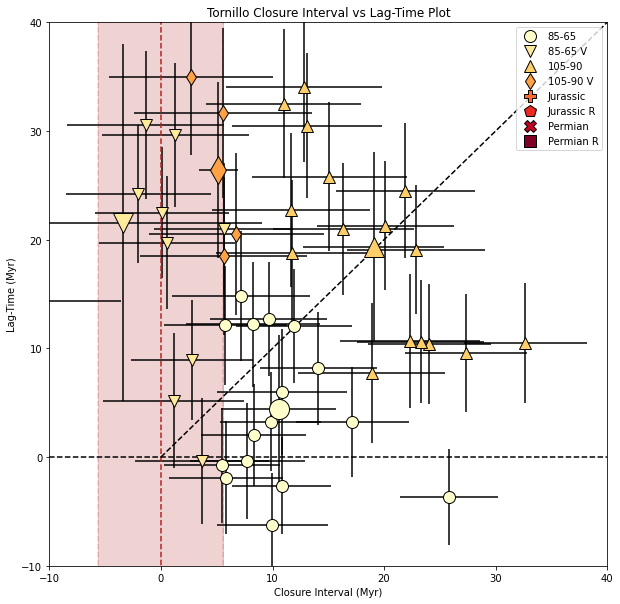

In [17]:
fig, ax = plt.subplots(figsize=(10, 10)) #makes a fig to plot on; ax = plot; if you do ax1, ax2, etc. you'll have multiple plots

#Lag-Time lines
ax.fill((5.6,5.6,-5.6,-5.6),(-15,40,40,-15), color='firebrick', alpha=0.2)
ax.plot((5.6,5.6),(-15,40), color='firebrick', linestyle='dashed', alpha=0.2)
ax.plot((-5.6,-5.6),(-15,40), color='firebrick', linestyle='dashed', alpha=0.2)
ax.plot((0,300),(0,300), color='black', linestyle='dashed')
ax.plot((0,0),(-15,250), color='firebrick', linestyle='dashed')
ax.plot((-10,600),(0,0), color='black', linestyle='dashed')

#Plot the scatterplot
for i in range(len(x)):
    colors = plt.cm.YlOrRd(np.linspace(0,1,len(sampleList)))
    markers = ['o','v','^','d','P','p','X','s']
    labels = sampleList
    ax.errorbar((x[i]), (y[i]), xerr=(x_err[i]), yerr=(y_err[i]), linestyle="", color='black', capsize=0)
    ax.plot((x[i]), (y[i]), marker=(markers[i]), markersize=12, color=(colors[i]), markeredgecolor='black', alpha=1, linestyle="", label=(labels[i]))

for i in range(len(avg_lags)):
    ax.errorbar((avg_closures[i]), (avg_lags[i]), xerr=(st_dev_closures[i]), yerr=(st_dev_lags[i]), linestyle="", color='black', capsize=0)
    ax.plot(avg_closures[i], avg_lags[i], marker=(markers[i]), markersize=20, color=(colors[i]), markeredgecolor='black', alpha=1, linestyle="")

#ax.set_xlim(-10, 250)
#ax.set_ylim(-15, 200)
ax.set_xlim(-10, 40)
ax.set_ylim(-10, 40)
    
# Label plot
ax.set_title ("Tornillo Closure Interval vs Lag-Time Plot")
ax.set_xlabel('Closure Interval (Myr)')
ax.set_ylabel('Lag-Time (Myr)')
ax.legend()

### Grouping Individual Lag Times vs Stratigraphic Age

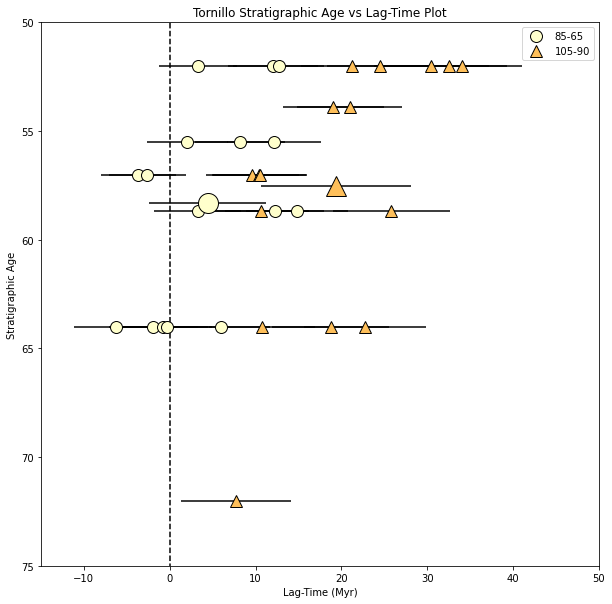

In [67]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.plot((0,0),(-15,250), color='black', linestyle='dashed')
ax.plot((-10,600),(0,0), color='black', linestyle='dashed')

for i in range(len(y)):
    colors = plt.cm.YlOrRd(np.linspace(0,1,len(sampleList)))
    colors = plt.cm.YlOrRd(np.linspace(0,1,4))
    #colors = plt.cm.YlOrRd(np.linspace(0.625,1,3))
    #markers = ['o','v','^','d','P','p','X','s']
    markers = ['o', '^']
    labels = sampleList
    ax.errorbar((y[i]), (z[i]), xerr=(y_err[i]), yerr=(0), linestyle="", color='black', capsize=0)
    ax.plot((y[i]), (z[i]), marker=(markers[i]), markersize=12, color=(colors[i]), markeredgecolor='black', alpha=1, linestyle="", label=(labels[i]))
    #ax.plot((z[i]), (y[i]), marker=(markers[i]), markersize=12, color=(colors[i]), markeredgecolor='black', alpha=1, linestyle="", label=(labels[i]))

for i in range(len(avg_lags)):
    ax.errorbar((avg_lags[i]), (avg_strat_ages[i]), xerr=(st_dev_lags[i]), yerr=(0), linestyle="", color='black', capsize=0)
    ax.plot((avg_lags[i]), (avg_strat_ages[i]), marker=(markers[i]), markersize=20, color=(colors[i]), markeredgecolor='black', alpha=1, linestyle="")

ax.set_xlim(-15, 50)
ax.set_ylim(75, 50)

ax.set_title ("Tornillo Stratigraphic Age vs Lag-Time Plot")
ax.set_xlabel('Lag-Time (Myr)')
ax.set_ylabel('Stratigraphic Age')
ax.legend()

In [18]:
import pathlib

In [19]:
pathlib.Path('Output').mkdir(parents=True, exist_ok=True) # Recursively creates the directory and does not raise an exception if the directory already exists 
fig.savefig('Output/Lag_time_vs_Closure_Zoom.pdf')

### Calculating Exhumation Rates Using Dimensional Analysis

Model Exhumation rate = [(Closure Temp - Surface Temp)/Geothermal Gradient]/Lag Time

Garver et al., (1999)

Formulas:
    
    Cooling Rate (C/Myr) = (ZHe Closure Temperature - Surface Temperature)/Lag Time
    
    Exhumation Rate (Km/Myr) = Cooling Rate/Geotherm (C/Myr / C/Km = Km/Myr)

### Calculating Individual Exhumation Estimates

In [9]:
#Parameters:
surface_temp = 15 #degrees Celsius
zhe_closure = 180 #degrees Celsius
geotherm = 25 #degrees Celsius per Kilometer depth
lag_times = df['lag_times']

#Calculates Cooling Rate (C/Myr)
cooling = (zhe_closure - surface_temp)/lag_times
    
#Calculates Exhumation Rate (Km/Myr) = Cooling Rate/Geotherm = (C/Myr / C/km)
exhumation = cooling/geotherm

#Create a new column in the DataFrame for the calculated exhumation rates
df['Exhumation'] = exhumation

df[:10]

,Index,Sample,Sample_ID,Sample_ID_V,Formation,Formation_V,Age,Age_V,Volcanic?,YSG,...,Strat_Age,Upb_Mode_v2,Lag_Time_Avg,Lag_Time_St_Dev,Lag_Time_2_St_Dev,lag_times,lag_time_errs,closure_intervals,closure_interval_errs,Exhumation
0,25,zDD-16TO-13-122,16TO-13,16TO-13,Canoe,Canoe,Eocene,Eocene,No,54.8,...,NaN,NaN,NaN,NaN,NaN,21.278267,5.946941,20.121733,6.103778,0.310176
1,33,zDD-16TO-13-55,16TO-13,16TO-13,Canoe,Canoe,Eocene,Eocene,No,54.8,...,NaN,NaN,NaN,NaN,NaN,24.509430,6.201906,21.890570,6.237278,0.269284
2,43,zDD-16TO-13-69,16TO-13,16TO-13,Canoe,Canoe,Eocene,Eocene,No,54.8,...,NaN,NaN,NaN,NaN,NaN,30.493759,6.674834,13.106241,6.726322,0.216438
3,48,zDD-16TO-13-42,16TO-13,16TO-13,Canoe,Canoe,Eocene,Eocene,No,54.8,...,NaN,NaN,NaN,NaN,NaN,32.500137,6.833575,10.999863,6.970491,0.203076
4,50,zDD-16TO-13-35,16TO-13,16TO-13,Canoe,Canoe,Eocene,Eocene,No,54.8,...,NaN,NaN,NaN,NaN,NaN,34.084084,6.958952,12.815916,6.990494,0.193639
5,24,zDD-16TO-11-114,16TO-11,16TO-11,Hannold Hill,Hannold Hill,Eocene,Eocene,No,55.0,...,NaN,NaN,NaN,NaN,NaN,19.071359,5.922740,22.828641,6.170806,0.346069
6,30,zDD-16TO-11-22,16TO-11,16TO-11,Hannold Hill,Hannold Hill,Eocene,Eocene,No,55.0,...,NaN,NaN,NaN,NaN,NaN,20.942445,6.070330,16.357555,6.312599,0.315149
7,15,zDD-16TO-09-111,16TO-09,16TO-09,Upper Black Peaks,Upper Black Peaks,Paleocene,Paleocene,No,64.3,...,58.0,85-65,6.735030,10.047520,20.095041,9.609836,5.425737,27.340164,5.445054,0.686796
8,16,zDD-16TO-09-68,16TO-09,16TO-09,Upper Black Peaks,Upper Black Peaks,Paleocene,Paleocene,No,64.3,...,58.0,Permian,82.489640,53.240091,106.480182,10.398044,5.487725,24.051956,5.506826,0.634735
9,17,zDD-16TO-09-130,16TO-09,16TO-09,Upper Black Peaks,Upper Black Peaks,Paleocene,Paleocene,No,64.3,...,58.0,105-90 V,18.205248,16.064932,32.129864,10.485957,5.494640,32.664043,5.534535,0.629413


### The Problem with Individual Exhumation Rate Estimates

The Lag-Time-Exhmation Rate Reciprocal Function (y = 7/x) Problem

In [10]:
exh = []

for i in range(len(sampleList)): 
    exh.append(df.loc[df['Upb_Mode_v']==sampleList[i]]['Exhumation'])

exh[:1]

[20     2.023527
 21     0.547456
 22     0.519971
 23     3.258594
 24     0.806408
 25     0.544582
 26    -1.805642
 27    -2.522886
 28     2.031103
 29     0.539782
 30     0.445620
 31    -1.049080
 32    -3.474519
 33    -8.646126
 34   -18.398222
 35     1.110552
 Name: Exhumation, dtype: float64]

C:\Users\culle\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


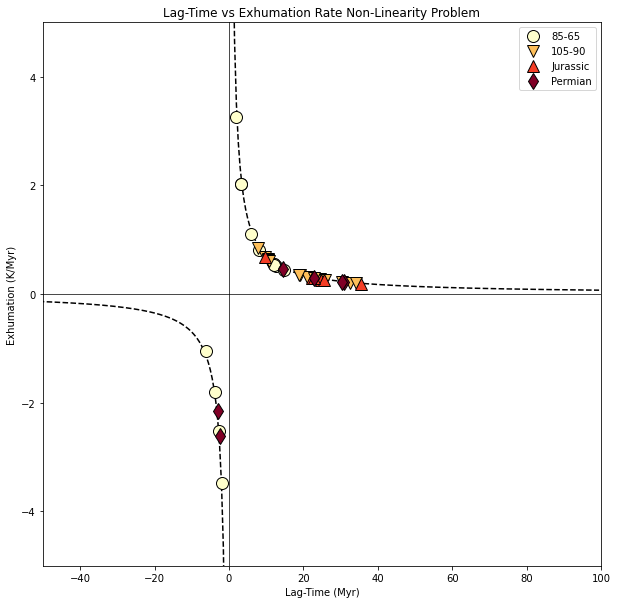

In [11]:
#The Lag Time-Exhumation Rate Reciprocal Function (y = 7/x) Problem
fig, ax = plt.subplots(figsize=(10, 10)) #makes a fig to plot on; ax = plot; if you do ax1, ax2, etc. you'll have multiple plots

def sim_exh(sim_lag):
    return 7/sim_lag

sim_lag = np.arange(-100, 100, 0.5)

plt.axvline(x=0, color='black', linewidth=0.7)
plt.axhline(y=0, color='black', linewidth=0.7)
ax.plot(sim_lag, sim_exh(sim_lag), color='black', linestyle='dashed')

#Plot the Calculated Lag-Time vs Exhumation Rate
for i in range(len(y)):
    colors = plt.cm.YlOrRd(np.linspace(0,1,len(sampleList)))
    markers = ['o','v','^','d','P','p','X','s']
    labels = sampleList
    ax.plot((y[i]), (exh[i]), marker=(markers[i]), markersize=12, color=(colors[i]), markeredgecolor='black', alpha=1, linestyle="", label=(labels[i]))
    
ax.set_xlim(-50, 100)
ax.set_ylim(-5, 5)    
    
# Label plot
ax.set_title ("Lag-Time vs Exhumation Rate Non-Linearity Problem")
ax.set_xlabel('Lag-Time (Myr)')
ax.set_ylabel('Exhumation (K/Myr)')
ax.legend()

### Base Case Exhumation Estimates

In [148]:
base_case_exh = {}
for avg_lag, sample in zip(avg_lags, sampleList):
    cooling = (zhe_closure - surface_temp)/avg_lag
    exhumation = cooling/geotherm
    
    base_case_exh[sample] = exhumation

base_case_exh

{'85-65': 1.4876178989200135,
 '105-90': 0.34094679512845544,
 'Jurassic': 0.2828627802690583,
 'Permian': 0.424807070669778}

### Monte Carlo Selection of Exhumation Rates

In [15]:
lag_dict = {}
for sample in sampleList:
    lag_dict[sample] = []

for i in range(5):
    for avg_lag, st_dev_lag, sample in zip(avg_lags, st_dev_lags, sampleList):
        s = np.random.normal(avg_lag, st_dev_lag)
        if s <= 1:
            lag_dict[sample].append(1)
        else:
            lag_dict[sample].append(s)

lag_mc = pd.DataFrame(data=lag_dict)
lag_mc[:10]

,85-65,85-65 V,105-90,105-90 V,Jurassic,Jurassic R,Permian,Permian R
0,9.935440,4.921342,8.311355,23.872997,27.399747,87.551596,39.664506,112.988944
1,1.000000,28.031233,20.513764,23.008193,31.837218,63.489798,15.115570,92.712846
2,11.929748,1.805620,29.183133,31.739581,23.556382,41.023450,2.633117,77.457712
3,15.502503,10.628404,32.502060,14.397840,19.121273,64.881130,21.076493,57.359969
4,1.000000,8.166749,10.977843,21.890782,34.641688,76.735773,1.000000,105.169298


In [16]:
#Parameters:
surface_temp = 15 #degrees Celsius
zhe_closure = 180 #degrees Celsius
geotherm = 25 #degrees Celsius per Kilometer depth

exh_mc = pd.DataFrame()

for column, sample in zip(lag_mc, sampleList):
    lag_times = lag_mc[column]

    cooling = (zhe_closure - surface_temp)/lag_times
    exhumation = cooling/geotherm
    
    exh_mc[sample] = exhumation

exh_mc

,85-65,85-65 V,105-90,105-90 V,Jurassic,Jurassic R,Permian,Permian R
0,0.664289,1.341097,0.794094,0.276463,0.240878,0.075384,0.166396,0.058413
1,6.600000,0.235452,0.321735,0.286854,0.207305,0.103954,0.436636,0.071188
2,0.553239,3.655254,0.226158,0.207942,0.280179,0.160884,2.506535,0.085208
3,0.425738,0.620978,0.203064,0.458402,0.345165,0.101724,0.313145,0.115063
4,6.600000,0.808155,0.601211,0.301497,0.190522,0.086009,6.600000,0.062756


In [159]:
exhh = pd.DataFrame(columns=sampleList)

i = 0
while i < 1000:
    exhh_dict = {}
    for sample in sampleList:
        exhh_dict[sample] = ''
    
    for avg_lag, st_dev_lag, sample in zip(avg_lags, st_dev_lags, sampleList):
        s = np.random.normal(avg_lag, st_dev_lag)
        if s <= 1:
            continue
            #lag_time = 1
            
            #cooling = (zhe_closure - surface_temp)/lag_time
            #exhumation = cooling/geotherm
            
            #exhh_dict[sample] = exhumation
        
        else:
            lag_time = s
            
            cooling = (zhe_closure - surface_temp)/lag_time
            exhumation = cooling/geotherm
            
            exhh_dict[sample] = exhumation
    
    j = 0
    for key, value in exhh_dict.items():
        if value != '':
            j += 1
    if j == len(sampleList):
        exhh = exhh.append(exhh_dict, ignore_index=True)
        i += 1

exhh[:10]

,85-65,105-90,Jurassic,Permian
0,4.140190,0.312316,1.214508,0.532336
1,0.363099,0.221886,0.224284,0.342917
2,0.442693,0.352221,0.270722,0.225842
3,1.169242,0.563941,0.357336,0.422787
4,0.531644,0.469792,0.322826,0.685932
5,1.628774,0.554733,0.271849,0.516861
6,0.959640,0.232156,0.387008,0.779078
7,0.976377,0.248638,0.325036,0.145075
8,0.510615,0.509920,0.338797,0.175488
9,1.081589,0.229273,0.526316,0.240041


In [74]:
test_dict = {}
for sample in sampleList:
        test_dict[sample] = ''

i=0
for key, value in test_dict.items():
    if value != '':
        i += 1
i

0

### Plotting Monte Carlo Simulated Exhumations Estimates

Text(0.5, 0, 'Exhumation Rate (Km/Myr)')

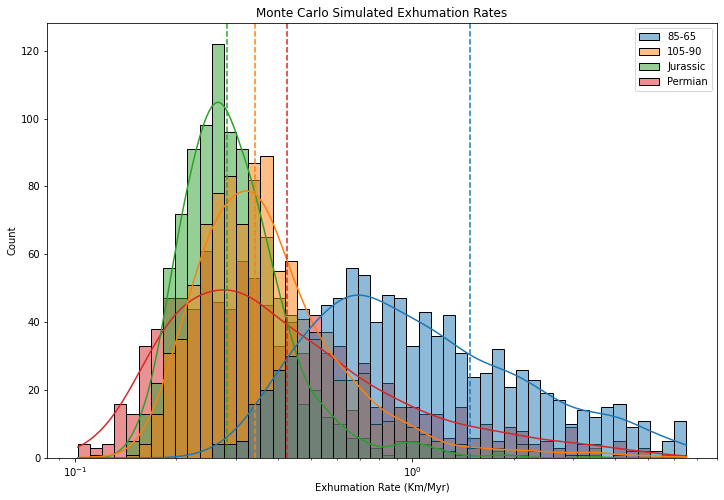

In [160]:
fig = plt.figure(1, figsize=(12,8))
sns.histplot(data=exhh, bins=50, log_scale = True, kde=True)

i = 0
for sample in sampleList:
    colors = sns.color_palette()
    plt.axvline(x=base_case_exh[sample], color=colors[i], linestyle='dashed')
    i += 1

plt.title ("Monte Carlo Simulated Exhumation Rates")
plt.xlabel('Exhumation Rate (Km/Myr)')

In [163]:
P10_exh = []
P50_exh = []
P90_exh = []
for sample in sampleList:
    sample_P10, sample_P50, sample_P90 = np.percentile(exhh[sample],[10, 50, 90])
    P10_exh.append(sample_P10)
    P50_exh.append(sample_P50)
    P90_exh.append(sample_P90)

P10_exh, P50_exh, P90_exh

([0.4496108247852808,
  0.2229726538588669,
  0.1999097050482344,
  0.1784148333907093],
 [0.9260919008092372,
  0.3488377013788896,
  0.28028924682737605,
  0.3477911214551139],
 [2.9908728460250584,
  0.7253149741867442,
  0.45375737125361004,
  1.224053593638135])

In [106]:
import pathlib

In [179]:
pathlib.Path('Output').mkdir(parents=True, exist_ok=True) # Recursively creates the directory and does not raise an exception if the directory already exists 
fig.savefig('Output/Modeled_Sediment_Discharge.pdf')

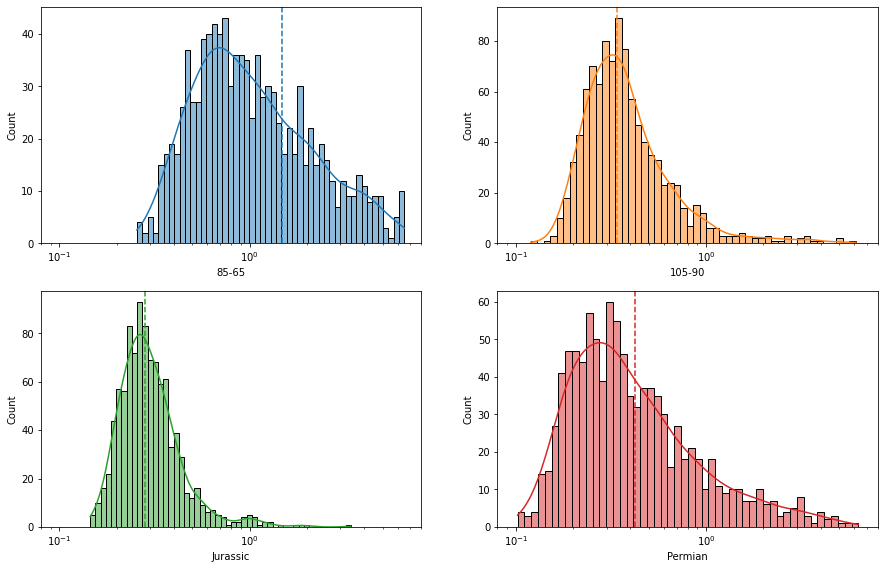

In [165]:
fig = plt.figure(figsize=(15,20))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
i=1

for column, sample in zip(exhh, sampleList):
    ax = fig.add_subplot(4, 2, i)
    colors = sns.color_palette()
    sns.histplot(data=exhh[column], color=colors[i-1], bins=50, log_scale=True, kde=True)
    plt.axvline(x=base_case_exh[sample], color=colors[i-1], linestyle='dashed')
    ax.set_xlim(0.08,8)
    #ax.set_ylim(0,300)
    i += 1

### Base Case Estimate of Sediment Discharge

In [167]:
#sampleList = ['85-65','85-65 V','105-90','105-90 V','Jurassic','Jurassic R','Permian','Permian R']

sampleList = ['85-65', '105-90', 'Jurassic', 'Permian']

#sampleList = ['Jurassic']

In [168]:
areas = {}
for sample in sampleList:
    area = int(np.unique(df.loc[df['Upb_Mode_v']==sample, 'Area']))
    areas[sample] = area

areas

{'85-65': 71195, '105-90': 23509, 'Jurassic': 21200, 'Permian': 21200}

In [170]:
sed_discharge = 0
for sample in sampleList:
    sed_discharge += base_case_exh[sample]*areas[sample]
sed_discharge

128928.87536018854

### Monte Carlo Estimates of Sediment Discharge

In [171]:
sed_discharge_template = {'Sed_Discharge':[]}
sed_discharge_mc = pd.DataFrame(sed_discharge_template)

for ind in exhh.index:
    sed_discharges = []
    for column, sample in zip(exhh, sampleList):
        sed_disc = exhh[column]*areas[sample] 
        sed_discharges.append(sed_disc)
    sed_discharge_mc['Sed_Discharge'] = sum(sed_discharges)

sed_discharge_mc.style.format("{:0.1f}")

,Sed_Discharge
0,339136.2
1,43091.8
2,50325.0
3,113040.5
4,70280.4
5,145722.5
6,98500.3
7,85324.8
8,59243.8
9,98640.5


In [173]:
P10, P50, P90 = np.percentile(sed_discharge_mc['Sed_Discharge'],[10, 50, 90])
P10, P50, P90

(56861.734021641, 98471.77595103896, 248600.01781832456)

Text(0.5, 0, 'Sediment Discharge (Km$^3$/Myr)')

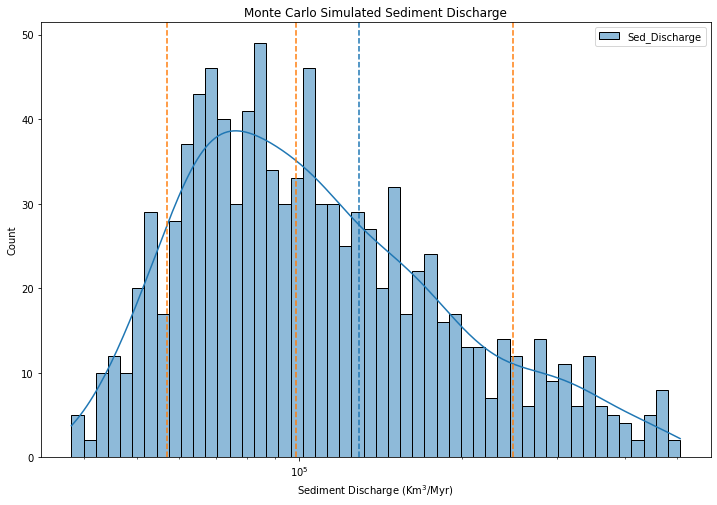

In [178]:
fig = plt.figure(1, figsize=(12,8))
sns.histplot(data=sed_discharge_mc, bins=50, log_scale = True, kde=True)
plt.axvline(x=sed_discharge, linestyle='dashed')
plt.axvline(x=P10, linestyle='dashed', color=colors[1])
plt.axvline(x=P50, linestyle='dashed', color=colors[1])
plt.axvline(x=P90, linestyle='dashed', color=colors[1])
#plt.xlim(30_000, 600_000)
plt.title ("Monte Carlo Simulated Sediment Discharge")
plt.xlabel('Sediment Discharge (Km$^3$/Myr)')